In [1]:
import ipywidgets as widgets

In [2]:
def squareit(n):
    return n*n

In [3]:
widgets.interact(squareit, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>

# Interactive Plotting and Monte Carlo simulations of CPPI

In [4]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

## GBM Interactive Plots

<AxesSubplot:>

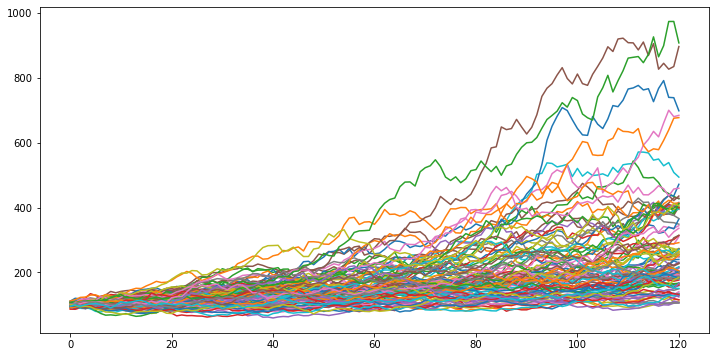

In [10]:
erk.gbm(10,100,mu=0.1).plot(figsize=(12,6),legend=False)

In [23]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion Model
    """
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios,mu=mu,sigma=sigma,s_0=s_0)
    ax = prices.plot(legend=False,color="indianred", alpha=0.5, linewidth=2,figsize=(12,6))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    # draw the dot at the orgin
    ax.plot(0,s_0, marker='o', color='darkred', alpha=0.2)

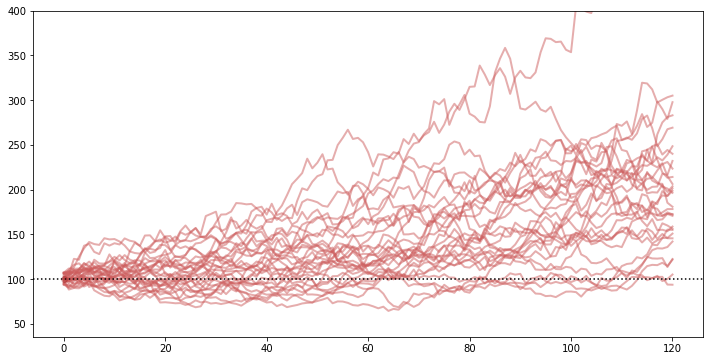

In [24]:
show_gbm(30,0.07,0.15)

In [25]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=(1,20,1),
                                   mu = (-0.2,0.2, .01),
                                   sigma=(0,0.3, .01)
                                  )

In [26]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [32]:
def show_cppi(n_scenarios=50, mu= 0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max = 100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start=100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, steps_per_year=12,s_0 = start)
    risky_r = pd.DataFrame(sim_rets)
    # run the back test
    btr = erk.run_cppi(risky_r= pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max()*y_max/100
    ax=wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
    
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                   mu=(0.,+.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0,2, .1),
                                   riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                           description="Zoom Y Axis")
                                   )
display(cppi_controls)
                                    
                                    

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…